In [1]:
import random
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

In [2]:
class Individual:

    def __init__(self, T, m, execution_times):
        self.code = [random.randint(0, m - 1) for _ in range(T)]
        self.execution_times = execution_times
        self.m = m
        self.calc_fitness()

    def calc_fitness(self):
        processor_times = [0] * self.m
        for task, processor in enumerate(self.code):
            processor_times[processor] += self.execution_times[task][processor]
        makespan = max(processor_times)
        self.fitness = -makespan

In [3]:
def selection(population, k): # torunament selection
    k = min(len(population), k)
    participants = random.sample(population, k) # izaberemo k kandidata
    return max(participants, key=lambda x: x.fitness) # od njih vraca onog sa najvecim fitnessom
    # na ovaj nacin GA favorizuje bolje rasporede

def crossover(parent1, parent2, child1, child2):
    breakpoint = random.randrange(1, len(parent1.code))
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child1.code[breakpoint:] = parent2.code[breakpoint:]

    child2.code[:breakpoint] = parent2.code[:breakpoint]
    child2.code[breakpoint:] = parent1.code[breakpoint:]

def mutation(child, p):
    #Za svaki gen u hromozomu (svaki zadatak) postoji verovatnoća p da se nasumično promeni.
    #Pomaže GA da ne zapadne u lokalni optimum i istraži nova rešenja.
    for i in range(len(child.code)):
        if random.random() < p:
            child.code[i] = random.randint(0, child.m - 1)

In [4]:
def ga(T, m, execution_times, population_size, num_generations, tournament_size, mutation_prob, elitism_size):
    assert population_size >= 2
    population = [Individual(T, m, execution_times) for _ in range(population_size)]
    new_population = [Individual(T, m, execution_times) for _ in range(population_size)]

    if elitism_size % 2 != population_size % 2:
        elitism_size += 1

    best_fitnesses = []
    for it in range(num_generations):
        population.sort(key=lambda x: x.fitness, reverse=True)
        best_fitnesses.append(-population[0].fitness)  # Append makespan (positive value)
        new_population[:elitism_size] = deepcopy(population[:elitism_size])

        for i in range(elitism_size, population_size, 2):
            parent1 = selection(population, tournament_size) 
            tmp, parent1.fitness = parent1.fitness, float('-inf') # Znači ovde osiguravamo da roditelji nisu klonovi jedan drugog.
            parent2 = selection(population, tournament_size)
            parent1.fitness = tmp

            # parent1 = selection(population, tournament_size) 
            # parent2 = selection(population, tournament_size)


            crossover(parent1, parent2, new_population[i], new_population[i + 1])
            # Kombinujemo gene od parent1 i parent2.

            # Dobijamo child1 i child2 → upisuju se u new_population[i] i new_population[i+1].
            # Primer:
            # parent1: [0,1,0,1]
            # parent2: [1,1,0,0]
            # child1: [0,1,0,0]
            # child2: [1,1,0,1]

            mutation(new_population[i], mutation_prob)
            mutation(new_population[i + 1], mutation_prob)

            new_population[i].calc_fitness()
            new_population[i + 1].calc_fitness()

        population = deepcopy(new_population)

    best_individual = max(population, key=lambda x: x.fitness)
    print(f'Best makespan: {-best_individual.fitness}, Best schedule: {best_individual.code}')
    plt.plot(best_fitnesses)
    plt.xlabel("Generation")
    plt.ylabel("Best Makespan")
    plt.title("Genetic Algorithm - Task Scheduling")
    plt.show()

Best makespan: 4, Best schedule: [0, 1, 1, 0]


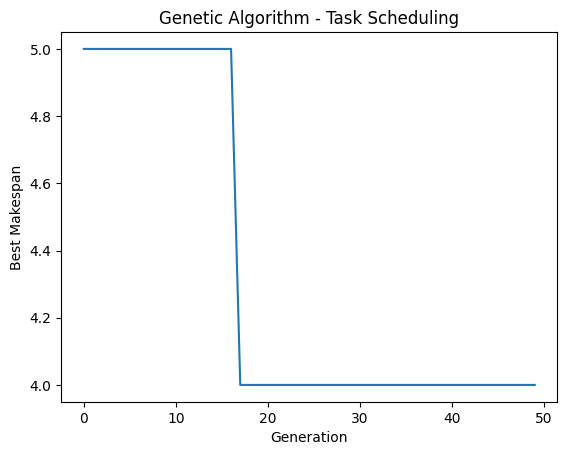

In [6]:
T = 4  # Number of tasks
m = 2  # Number of processors
execution_times = [
    [3, 2],
    [2, 1],
    [4, 3],
    [1, 2],
]
population_size = 20
num_generations = 50
tournament_size = 3
mutation_prob = 0.1
elitism_size = 2

ga(T, m, execution_times, population_size, num_generations, tournament_size, mutation_prob, elitism_size)